In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!ls *pkl

composite_df.pkl        rf_results.pkl          sr_df.pkl
rdr_coords.pkl          rnn_results.pkl         xgb_results.pkl
refl_new.pkl            snow_scraped_df.pkl     xgb_results_meltoff.pkl


In [3]:
### basic data
# reflectivity data separated by altitude
refl = pd.read_pickle('refl_new.pkl')

# contains full sraped snow sensor data
snow_scraped = pd.read_pickle('snow_scraped_df.pkl')

# small df, just contains lat/long/elev_ft of seven radar stations that cover the sierra
rdr_coords = pd.read_pickle('rdr_coords.pkl')

# contains concise snow sensor data, with measured snowfall and nearest radar station
sensor_data = pd.read_pickle('sr_df.pkl')

### modeling data
# reflectivity data with all altitudes on a single row, as well as expected_mm, ready to be used in modeling
composite = pd.read_pickle('composite_df.pkl')

# contains random forest prediction results
rf_results = pd.read_pickle('rf_results.pkl')
# contains random forest prediction results
xgb_results = pd.read_pickle('xgb_results_meltoff.pkl')

# rnn results
rnn_results = pd.read_pickle('rnn_results.pkl')

In [4]:
composite.head()

,day_id,difphase_2000,difphase_3000,difphase_4000,difphase_5000,difphase_6000,elev_m,expected_mm,gate_time,lat,...,velocity_2000,velocity_3000,velocity_4000,velocity_5000,velocity_6000,xcorr_ratio_2000,xcorr_ratio_3000,xcorr_ratio_4000,xcorr_ratio_5000,xcorr_ratio_6000
0,13,167.776169,168.866653,171.121323,173.316727,181.199249,2882.25,5.08,2017-01-15 07:57:39,37.703352,...,-4.941957,-4.935023,-4.923673,-4.907901,-10.493554,0.688717,0.702152,0.691295,0.680555,0.651727
1,13,102.260727,129.469727,115.678581,115.666161,115.648010,2882.25,5.08,2017-01-15 06:00:45,37.703352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.877550,0.800334,0.805096,0.805194,0.805338
2,13,92.946762,109.166084,110.324966,111.466507,112.618858,2882.25,5.08,2017-01-15 04:03:51,37.703352,...,12.000000,12.000000,11.999999,7.592619,6.970221,0.820722,0.771881,0.771519,0.761149,0.750628
3,13,86.175270,106.260468,108.557083,110.931160,113.360359,2882.25,5.08,2017-01-15 01:58:13,37.703352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.797316,0.801632,0.804528,0.807645,0.810974
4,13,131.954239,138.295044,139.404892,147.113617,147.664536,2882.25,5.08,2017-01-15 00:02:26,37.703352,...,9.500000,9.500000,9.500000,9.500000,0.000000,0.535689,0.591346,0.598697,0.638290,0.683119


In [5]:
sensor_data.head(20)

,st_code,date,elev_ft,today_in,st_lat,st_lon,r_closest,r_dist_km,r_elev_delta_ft
0,scn,2017-01-01,8750,12.1,38.747,-120.068,krgx,123.437840,451.0
1,cxs,2017-01-01,8353,6.4,38.692,-120.002,krgx,126.798830,54.0
2,cap,2017-01-01,8000,5.4,38.710,-120.042,krgx,126.269378,-299.0
3,alp,2017-01-01,7600,5.8,38.804,-120.216,krgx,123.925915,-699.0
4,frn,2017-01-01,7600,6.3,38.805,-120.213,krgx,123.695443,-699.0
5,sil,2017-01-01,7100,4.6,38.678,-120.118,krgx,132.217957,-1199.0
6,csl,2017-01-01,6900,7.0,39.325,-120.367,krgx,91.212947,-1399.0
7,vvl,2017-01-01,6700,5.6,38.944,-120.306,krgx,115.672536,-1599.0
8,hys,2017-01-01,6600,4.6,39.282,-120.527,kbbx,98.090223,6433.0
9,rbb,2017-01-01,5900,1.4,38.912,-120.379,kdax,121.830822,5870.0


In [6]:
sg = sensor_data.groupby('st_code')

example code do not execute
`fig, ax = plt.subplots()
labels = []
for key, grp in df.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key)
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()`

In [7]:
sensor_data['date'].max()

Timestamp('2017-03-02 00:00:00')

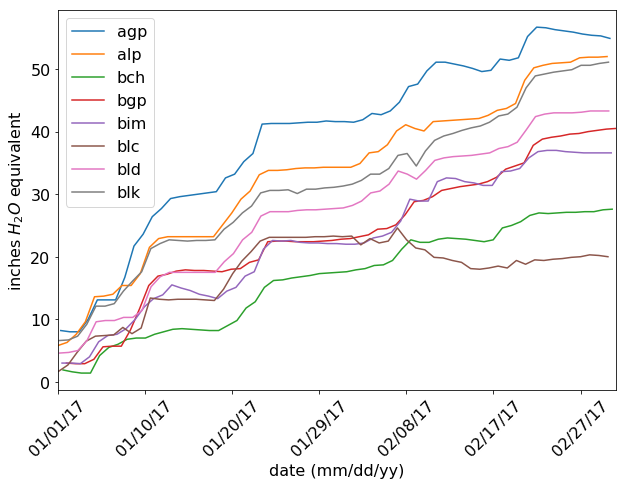

In [70]:
fig, ax = plt.subplots()
j= 0
labels = []
for i,g in sg:
    labels.append(i)
    g['today_in'].iloc[:400].plot(ax=ax, figsize = (10,7))
    j+=1
    if j == 8:
        break
ax.legend(labels, loc='best', fontsize=16)
#plt.xlabel("date")
#plt.ylabel("inches of snow water equivalent")
# set the locations of the xticks
#xticks( arange(6) )

# set the locations and labels of the xticks
fs = 16 

plt.xticks(range(0,sensor_data.shape[0],800), 
           sensor_data.iloc[range(0,sensor_data.shape[0],800)]['date'].apply(lambda d: d.strftime('%D')), 
           rotation=45,
          fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('inches $H_2O$ equivalent', fontsize=fs)
plt.xlabel('date (mm/dd/yy)', fontsize=fs)
plt.show()

## XGBoost

In [8]:
xgb_results.columns

Index(['day_id', 'difphase_2000', 'difphase_3000', 'difphase_4000',
       'difphase_5000', 'difphase_6000', 'elev_m', 'expected_mm', 'lat', 'lon',
       'r_dist_km', 'r_elev_delta_m', 'refl_2000', 'refl_3000', 'refl_4000',
       'refl_5000', 'refl_6000', 'time_until_reading', 'time_until_reading_hr',
       'velocity_2000', 'velocity_3000', 'velocity_4000', 'velocity_5000',
       'velocity_6000', 'xcorr_ratio_2000', 'xcorr_ratio_3000',
       'xcorr_ratio_4000', 'xcorr_ratio_5000', 'xcorr_ratio_6000', 'dates',
       'st_code', 'predicted_mm'],
      dtype='object')

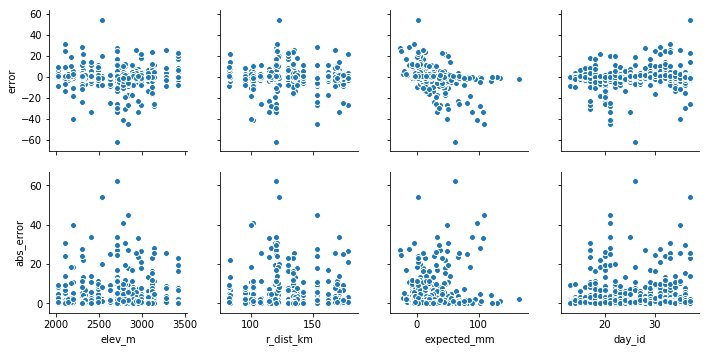

In [9]:
xgb_results['error'] = xgb_results['predicted_mm'] - xgb_results['expected_mm']
xgb_results['abs_error'] = abs(xgb_results['predicted_mm'] - xgb_results['expected_mm'])

sns.pairplot(xgb_results['error abs_error elev_m r_dist_km expected_mm day_id'.split()],
             x_vars= 'elev_m r_dist_km expected_mm day_id'.split(),
             y_vars='error abs_error'.split())

plt.show()

In [10]:
xgb_results.head()

,day_id,difphase_2000,difphase_3000,difphase_4000,difphase_5000,difphase_6000,elev_m,expected_mm,lat,lon,...,xcorr_ratio_2000,xcorr_ratio_3000,xcorr_ratio_4000,xcorr_ratio_5000,xcorr_ratio_6000,dates,st_code,predicted_mm,error,abs_error
0,13.0,116.222633,130.411595,129.017369,131.698834,134.098203,2882.25,5.08,37.703352,-119.164704,...,0.743999,0.733469,0.734227,0.738567,0.740357,2017-01-15 07:57:39,agp,5.313772,0.233772,0.233772
1,13.0,118.245816,118.309166,104.660454,104.816889,105.500374,2989.00,-2.54,37.108589,-118.498144,...,0.700185,0.707263,0.702863,0.702816,0.702751,2017-01-15 07:57:46,bgp,-0.419342,2.120658,2.120658
2,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,3416.00,0.00,37.080630,-118.577302,...,0.000000,0.000000,0.000000,0.000000,0.000000,2017-01-15 07:58:57,bsh,-0.258756,-0.258756,0.258756
3,13.0,152.473344,157.089727,151.893309,134.995903,121.410887,3141.50,2.54,36.478846,-118.466913,...,0.767915,0.795039,0.789686,0.772846,0.787696,2017-01-15 07:59:04,chp,1.797830,-0.742170,0.742170
4,13.0,0.000000,0.000000,0.000000,0.000000,0.000000,2989.00,0.00,37.876017,-119.278994,...,0.000000,0.000000,0.000000,0.000000,0.000000,2017-01-15 07:58:50,dan,-1.747618,-1.747618,1.747618


In [11]:
avg_snowfall = xgb_results['expected_mm'].median()
print(avg_snowfall)

5.080000000000041


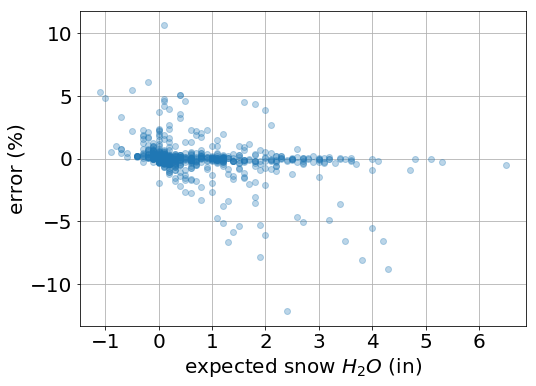

In [12]:
fs = 20
plt.figure(figsize = (8,5.8))
plt.plot(xgb_results['expected_mm']*0.0393701,xgb_results['error']/avg_snowfall, 'o', alpha=0.3)
plt.ylabel("error (%)", fontsize=fs)
plt.xlabel('expected snow $H_2O$ (in)', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#plt.xlim(0,170)
#plt.ylim(-10,10)
plt.grid()
plt.savefig('error.pdf', bbox_inches='tight')
plt.show()

In [13]:
xgb_results['abs_error'].mean()

3.4247578769542475

In [15]:
(xgb_results['abs_error'][xgb_results['expected_mm']!=0]/xgb_results['expected_mm'][xgb_results['expected_mm']!=0]).mean()



0.19263066849356114

In [16]:
xgb_results['dates'].max()
xgb_results['dates'].min()

Timestamp('2017-01-15 07:56:45')

In [17]:
xg = xgb_results.groupby('st_code')

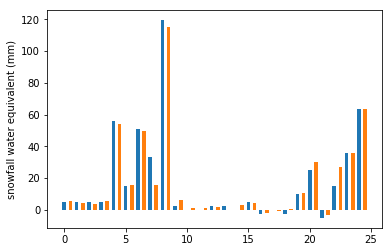

In [18]:
# plot one station
a = xg.get_group('agp')[['dates','expected_mm','predicted_mm']]
plt.bar(range(len(a.expected_mm)), a.expected_mm, width=.3)
plt.bar(np.array(range(len(a.predicted_mm)))+.5, a.predicted_mm, width=.3)
plt.ylabel('snowfall water equivalent (mm)')
#plt.bar(a.dates, a.predicted_mm)
#plt.xticks(a.dates)
plt.show()

plot cumulative snowfall for one sensor

In [19]:
xgb_results.dates.min()

Timestamp('2017-01-15 07:56:45')

In [20]:
# get starting snow fall values
sensor_data['today_mm'] = sensor_data.today_in*25.4
start_day = pd.to_datetime('2017-01-15')
starting_snow = {}
for sr in xg.groups.keys():
    a = sensor_data[sensor_data.st_code == sr][['date','today_mm']]['date'] == start_day
    starting_snow[sr] = sensor_data[sensor_data.st_code == sr][a]['today_mm'].iloc[0]


In [21]:
dates_interp = pd.date_range(xgb_results.dates.min(), xgb_results.dates.max(), freq="12H")
dates_interp_float = [float(d.value) for d in dates_interp]

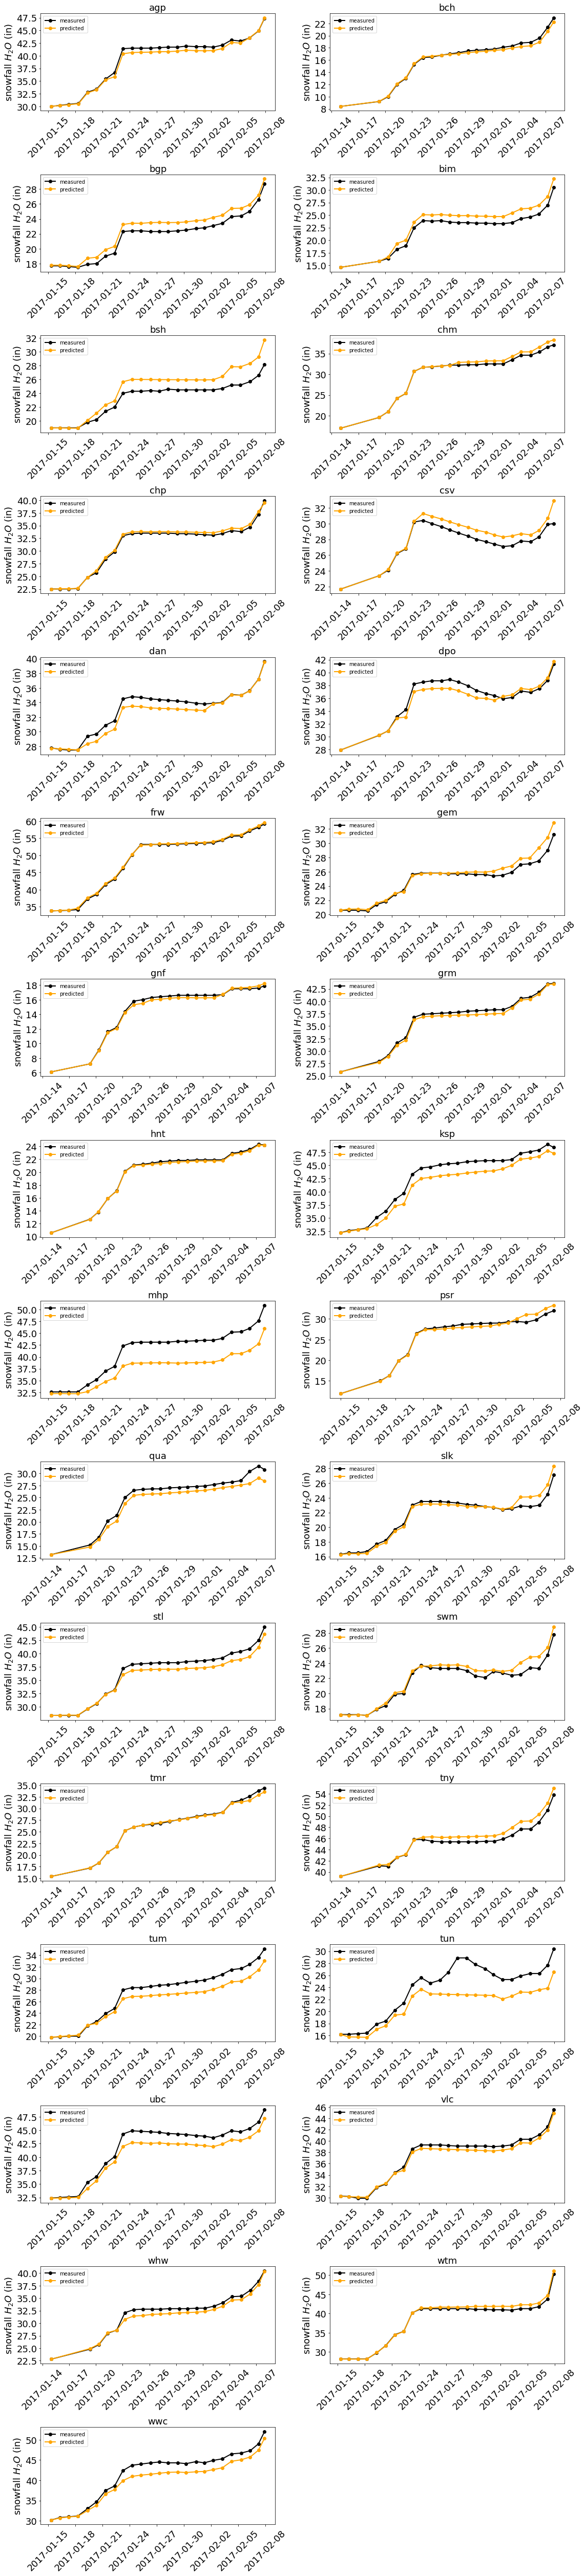

CPU times: user 30 s, sys: 5.8 s, total: 35.8 s
Wall time: 21.1 s


In [82]:
%%time
from scipy import interpolate
from scipy.interpolate import interp1d
all_snow_pred = {}
all_snow_exp = {}
j = 1
plt.figure(figsize=(16,70))
for st_code,sensor in xg:
    
    if sensor.dates.iloc[0].floor('1D') == start_day:
        s_dates = sensor.dates
        cumul_exp =  []
        cumul_pred = []
    else:
        s_dates = [start_day] + list(sensor.dates)
        cumul_exp =  [starting_snow[st_code]]
        cumul_pred = [starting_snow[st_code]]

    for _,row in sensor.iterrows():
        if len(cumul_exp) == 0:
            cumul_exp.append(row['expected_mm'] + starting_snow[st_code])
            cumul_pred.append(row['predicted_mm'] + starting_snow[st_code])
        else:
            cumul_exp.append(row['expected_mm'] + cumul_exp[-1])
            cumul_pred.append(row['predicted_mm'] + cumul_pred[-1])

    #  linear interpolation
    x = [d.value for d in s_dates]
    y = cumul_pred
    xnew = dates_interp_float
    y_interp = np.interp(xnew, x,y)
    all_snow_pred[st_code] = y_interp

    x = [d.value for d in s_dates]
    y = cumul_exp
    xnew = dates_interp_float
    y_interp = np.interp(xnew, x,y)
    all_snow_exp[st_code] = y_interp
    
    fs=18
    plt.subplot(16,2,j)
    j +=1
    plt.plot(s_dates, np.array(cumul_exp)*0.0393701, '-o', color='black', linewidth=2.0, label='measured')
    plt.plot(s_dates, np.array(cumul_pred)*0.0393701, '-o', color='orange', linewidth=2.0, label='predicted')
#    plt.plot(dates_interp, y_interp, '+', color='blue', linewidth=2.0)
    plt.title(st_code, fontsize=fs)
    plt.legend()
    plt.ylabel('snowfall $H_2O$ (in)', fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xticks(rotation=45, fontsize=fs)
    plt.tight_layout()
    #plt.savefig('line.pdf', bbox_inches='tight')
plt.show()

In [94]:
s_dates

17    2017-01-15 07:58:56
35    2017-01-16 06:08:43
53    2017-01-17 05:56:15
71    2017-01-18 06:07:47
102   2017-01-19 07:58:21
133   2017-01-20 07:59:28
164   2017-01-21 07:58:45
195   2017-01-22 07:58:16
226   2017-01-23 06:01:08
257   2017-01-24 06:00:51
288   2017-01-25 05:58:45
319   2017-01-26 07:57:43
350   2017-01-27 05:58:22
381   2017-01-28 05:57:24
412   2017-01-29 07:59:45
443   2017-01-30 06:00:00
474   2017-01-31 07:58:34
505   2017-02-01 05:59:35
536   2017-02-02 05:59:53
567   2017-02-03 06:02:13
598   2017-02-04 06:01:43
629   2017-02-05 07:59:22
660   2017-02-06 07:59:28
691   2017-02-07 05:59:15
722   2017-02-07 21:59:00
Name: dates, dtype: datetime64[ns]

In [111]:
a=(s_dates[53] - s_dates[17])
a.round("1H")
a.seconds

79039

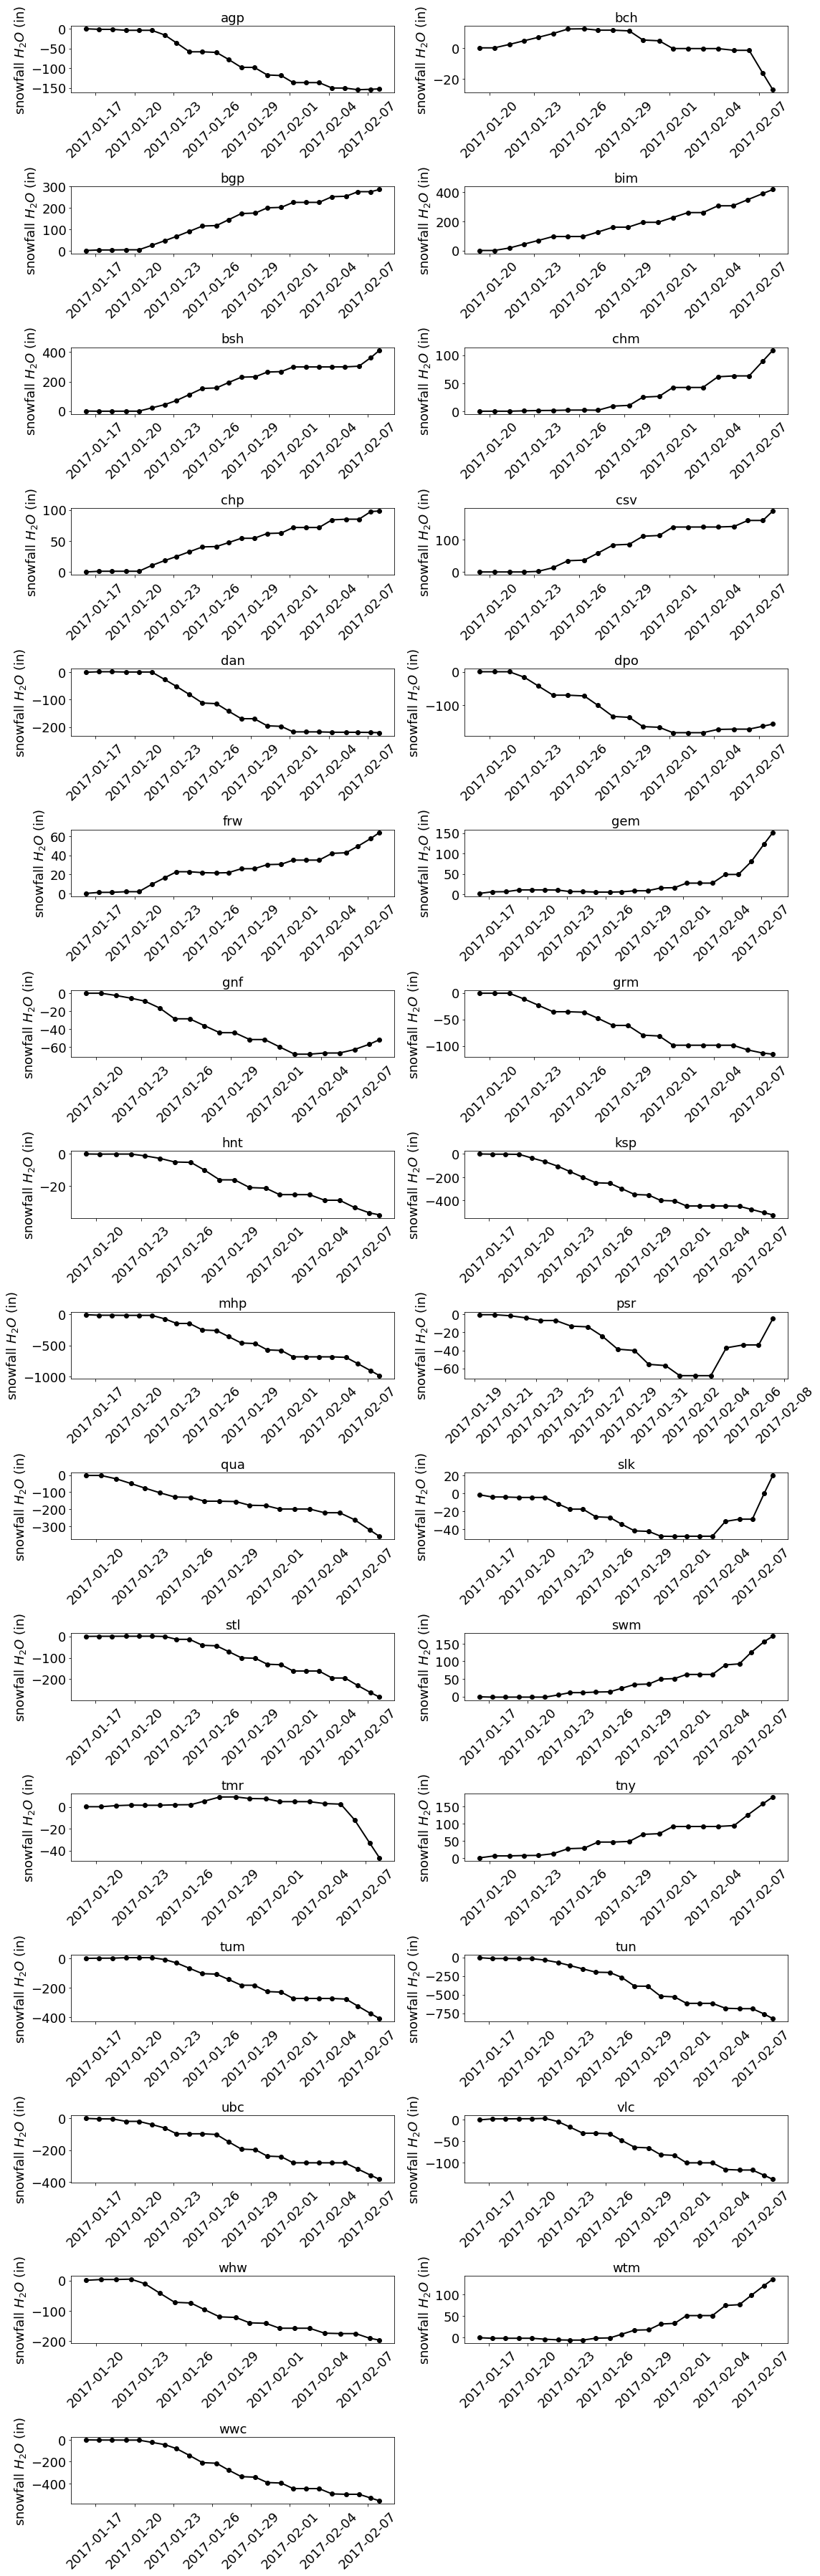

CPU times: user 22.7 s, sys: 4.34 s, total: 27.1 s
Wall time: 15.6 s


In [113]:
%%time
# plot just error
from scipy import interpolate
from scipy.interpolate import interp1d
all_snow_pred = {}
all_snow_exp = {}
j = 1
plt.figure(figsize=(16,50))
for st_code,sensor in xg:
    
    if sensor.dates.iloc[0].floor('1D') == start_day:
        s_dates = sensor.dates
        cumul_exp =  []
        cumul_pred = []
    else:
        s_dates = [start_day] + list(sensor.dates)
        cumul_exp =  [starting_snow[st_code]]
        cumul_pred = [starting_snow[st_code]]

    for _,row in sensor.iterrows():
        if len(cumul_exp) == 0:
            cumul_exp.append(row['expected_mm'] + starting_snow[st_code])
            cumul_pred.append(row['predicted_mm'] + starting_snow[st_code])
        else:
            cumul_exp.append(row['expected_mm'] + cumul_exp[-1])
            cumul_pred.append(row['predicted_mm'] + cumul_pred[-1])

    #  linear interpolation
    x = [d.value for d in s_dates]
    y = cumul_pred
    xnew = dates_interp_float
    y_interp = np.interp(xnew, x,y)
    all_snow_pred[st_code] = y_interp

    x = [d.value for d in s_dates]
    y = cumul_exp
    xnew = dates_interp_float
    y_interp = np.interp(xnew, x,y)
    all_snow_exp[st_code] = y_interp
    
    pred_error = (np.array(cumul_pred)-np.array(cumul_exp))*0.0393701
    pred_error_int = []
    for i in range(len(pred_error)-1):
        h = (list(s_dates)[i+1] - list(s_dates)[i]).seconds/3600
        f = (pred_error[i+1] + pred_error[i])/2
        pred_error_slice = f*h
        if len(pred_error_int) == 0:
            pred_error_int.append(pred_error_slice)
        else:
            pred_error_int.append(pred_error_int[-1] + pred_error_slice)
            
    
    
    fs=18
    plt.subplot(16,2,j)
    j +=1
    #plt.plot(s_dates, pred_error, '-o', color='black', linewidth=2.0)
    # plot cumulative (integrated) error
    plt.plot(list(s_dates)[1:], pred_error_int, '-o', color='black', linewidth=2.0)
    plt.title(st_code, fontsize=fs)
    plt.ylabel('snowfall $H_2O$ (in)', fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xticks(rotation=45, fontsize=fs)
    plt.tight_layout()
    #plt.savefig('line.pdf', bbox_inches='tight')
plt.show()

In [105]:
pred_error_int

[-3274647241133.3794,
 -8585581403393.459,
 -13844096625291.723,
 -38411424897246.266,
 -95362778872637.812,
 -169225135958030.88,
 -243558320293089.0,
 -377079138468091.5,
 -602671078123260.0,
 -838501395061277.75,
 -1097777727184028.0,
 -1319022990216907.0,
 -1540105560754962.0,
 -1756473299607120.2,
 -1933229604879952.5,
 -2152835723412868.0,
 -2336108074185087.5,
 -2525661909538035.0,
 -2719589679346771.0,
 -2894194510953898.0,
 -3056538421875166.5,
 -3194931642887337.5,
 -3319098020995018.5,
 -3411419551295331.5]

plot for all sensors, with padding

In [53]:
# delete tun, mhp, ksp, ubc, wwc, tum
del all_snow_pred['tum']

In [54]:
snow_values_pred = np.vstack(all_snow_pred.values())
avg_sensor_pred = np.mean(snow_values_pred, axis=0)
std_sensor_pred = np.std(snow_values_pred, axis=0)

snow_values_exp = np.vstack(all_snow_exp.values())
avg_sensor_exp = np.mean(snow_values_exp, axis=0)
std_sensor_exp = np.std(snow_values_exp, axis=0)

#avg_sensor_pred_error = np.mean(snow_values_pred - snow_values_exp, axis=0)

In [55]:
# http://strftime.org/
dates_plot = pd.date_range(xgb_results.dates.min(), xgb_results.dates.max(), freq="4D")
dates_plot_label = [d.strftime("%d %b %Y") for d in dates_plot]

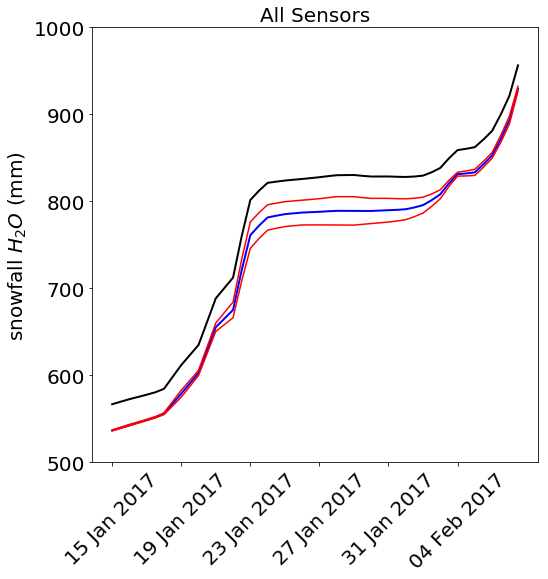

In [56]:

fs=20
plt.figure(figsize=[8,8])
plt.plot(dates_interp, avg_sensor_pred, color='blue', linewidth=2.0)
plt.plot(dates_interp, avg_sensor_exp, color='black', linewidth=2.0)
#plt.plot(dates_interp, avg_sensor-std_sensor)
plt.plot(dates_interp, avg_sensor_pred+avg_sensor_pred_error, color='red')
plt.plot(dates_interp, avg_sensor_pred-avg_sensor_pred_error, color='red')
#plt.plot(dates_interp, std_sensor)
plt.ylim(500,1000)
plt.title('All Sensors', fontsize=fs)
#plt.ylabel('snowfall H_2O (mm)', fontsize=fs)
plt.ylabel("snowfall $H_2O$ (mm)", fontsize=fs)


plt.yticks(fontsize=fs)
plt.xticks(dates_plot, dates_plot_label, rotation=45, fontsize=fs)
plt.savefig('allsensors.pdf', bbox_inches='tight')
plt.show()

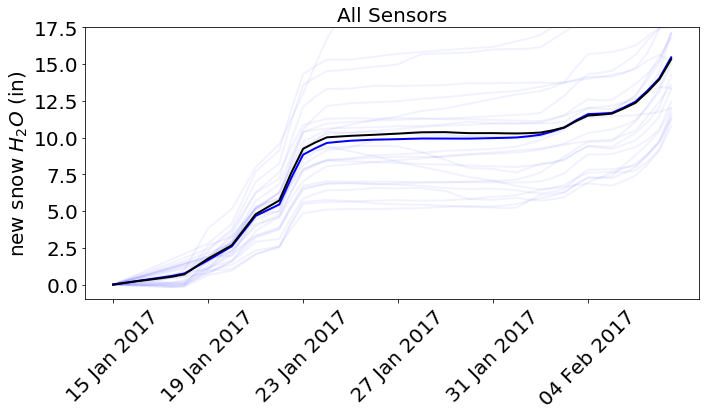

In [71]:
#import matplotlib.style as style
#style.use('fivethirtyeight')

# all sensors with translucent individual senors

# setup figure

plt.figure(figsize=[11,5])
#for a_sensor in all_snow_pred.values():
#    plt.plot(dates_interp, (a_sensor-a_sensor[0])*0.0393701, color='blue', linewidth=2.0, alpha=.05)

plt.plot(dates_interp, (avg_sensor_pred-avg_sensor_pred[0])*0.0393701, color='blue', linewidth=2.0)
plt.plot(dates_interp, (avg_sensor_exp-avg_sensor_exp[0])*0.0393701, color='black', linewidth=2.0)

# plot decoration
fs=20
plt.ylim(-1,17.5)
plt.title('All Sensors', fontsize=fs)
plt.ylabel("new snow $H_2O$ (in)", fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(dates_plot, dates_plot_label, rotation=45, fontsize=fs)
plt.savefig('allsensors-single.pdf', bbox_inches='tight')
plt.show()

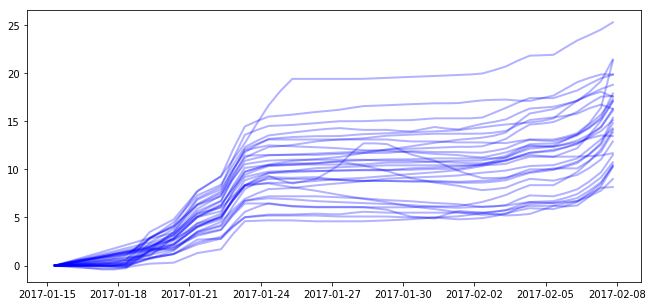

In [76]:
plt.figure(figsize=[11,5])
for a_sensor in all_snow_exp.values():
    plt.plot(dates_interp, (a_sensor-a_sensor[0])*0.0393701, color='blue', linewidth=2.0, alpha=.3)
plt.show()

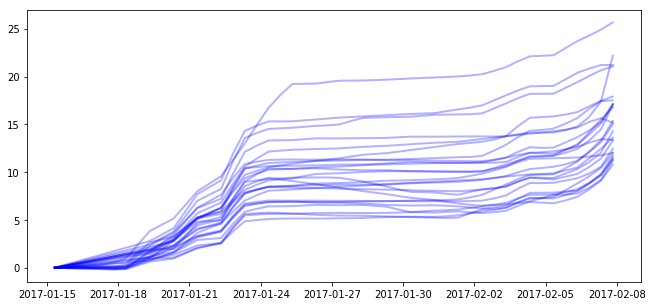

In [77]:
plt.figure(figsize=[11,5])
for a_sensor in all_snow_pred.values():
    plt.plot(dates_interp, (a_sensor-a_sensor[0])*0.0393701, color='blue', linewidth=2.0, alpha=.3)
plt.show()

RNN residuals

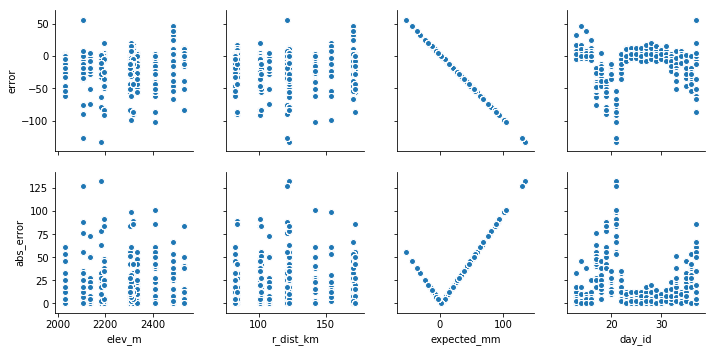

In [179]:
rnn_results['error'] = rnn_results['predicted_mm'] - rnn_results['expected_mm']
rnn_results['abs_error'] = abs(rnn_results['predicted_mm'] - rnn_results['expected_mm'])

sns.pairplot(rnn_results['error abs_error elev_m r_dist_km expected_mm day_id'.split()],
             x_vars= 'elev_m r_dist_km expected_mm day_id'.split(),
             y_vars='error abs_error'.split())

plt.show()

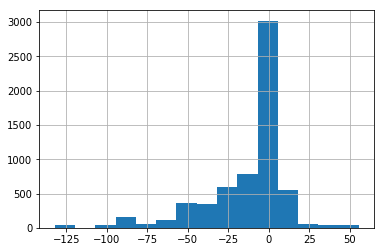

In [180]:
rnn_results['error'].hist(bins=15)
plt.show()

In [181]:
rnn_results['expected_mm predicted_mm'.split()]

,expected_mm,predicted_mm
0,-2.54,2.490953
1,-2.54,2.490953
2,-2.54,2.490953
3,-2.54,2.490953
4,-2.54,2.490953
5,-2.54,2.490953
6,-2.54,2.490953
7,-2.54,2.490953
8,-2.54,2.490953
9,-2.54,2.490953


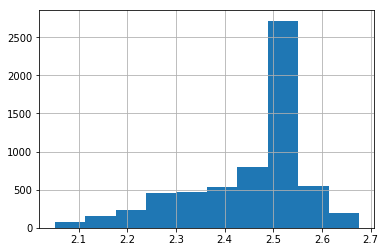

In [183]:
rnn_results['predicted_mm'].hist()
plt.show()


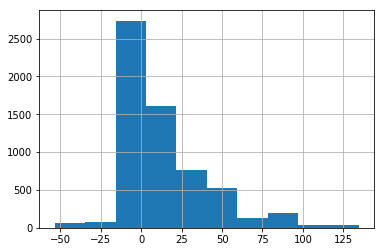

In [189]:
rnn_results['expected_mm'].hist()
plt.show()
